## Egg Price Analysis

### Setup and Data Loading

In [135]:
import pandas as pd
from sqlalchemy import create_engine
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Configurations matching docker
DB_CONFIG = {
    'user': os.getenv('DB_USER', 'egg_user'),
    'password': os.getenv('DB_PASSWORD', 'egg_pass'),
    'host': os.getenv('DB_HOST', 'localhost'),
    'port': os.getenv('DB_PORT', 5432),
    'database': os.getenv('DB_NAME', 'egg_prices')
}

# Clean connection string
conn_string = (
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}"
    f"@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
)

# Creating Dataframe and CSV file for analysis
engine = create_engine(conn_string)
df = pd.read_sql("SELECT * FROM economic_data", engine)
df.to_csv('data/egg_price_drivers.csv')

In [136]:
df.head()

,date,flu_outbreak_count,flu_birds_affected,egg_price,corn_price,month,quarter,egg_price_lag,flu_lag
0,2019-01-01,0.0,0.0,1.554,166.846241,1,1,NaN,NaN
1,2019-02-01,0.0,0.0,1.557,169.656283,2,1,1.554,0.0
2,2019-03-01,0.0,0.0,1.544,166.321332,3,1,1.557,0.0
3,2019-04-01,0.0,0.0,1.463,161.653387,4,2,1.544,0.0
4,2019-05-01,0.0,0.0,1.362,171.180154,5,2,1.463,0.0


### Statistical Validation 

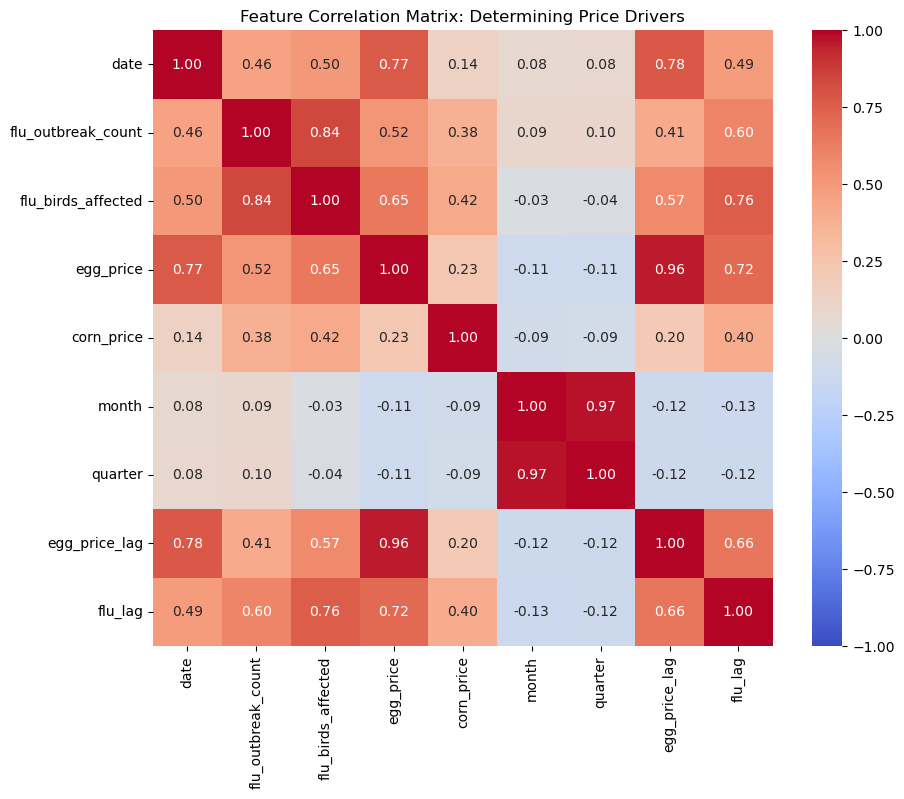

In [137]:
eda_df = df.dropna() # drop first row from shift

# Plot Correlation Matrix 
corr_matrix = eda_df.corr()

fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            vmin=-1, vmax=1)

plt.title('Feature Correlation Matrix: Determining Price Drivers')
plt.savefig('images/eda/egg_price_correlation_matrix.png')


In [138]:
# Creating additional lags to match egg price change difference
df['egg_diff'] = df['egg_price'].diff()
df['egg_diff_lag'] = df['egg_diff'].shift(1) 

df['corn_diff'] = df['corn_price'].diff()
df['corn_diff_lag'] = df['corn_diff'].shift(1)

df['flu_panic_lag'] = df['flu_outbreak_count'].shift(1)

df = df.dropna()

df.head()

,date,flu_outbreak_count,flu_birds_affected,egg_price,corn_price,month,quarter,egg_price_lag,flu_lag,egg_diff,egg_diff_lag,corn_diff,corn_diff_lag,flu_panic_lag
2,2019-03-01,0.0,0.0,1.544,166.321332,3,1,1.557,0.0,-0.013,0.003,-3.334951,2.810042,0.0
3,2019-04-01,0.0,0.0,1.463,161.653387,4,2,1.544,0.0,-0.081,-0.013,-4.667945,-3.334951,0.0
4,2019-05-01,0.0,0.0,1.362,171.180154,5,2,1.463,0.0,-0.101,-0.081,9.526767,-4.667945,0.0
5,2019-06-01,0.0,0.0,1.203,195.167922,6,2,1.362,0.0,-0.159,-0.101,23.987769,9.526767,0.0
6,2019-07-01,0.0,0.0,1.243,189.486373,7,3,1.203,0.0,0.040,-0.159,-5.681549,23.987769,0.0


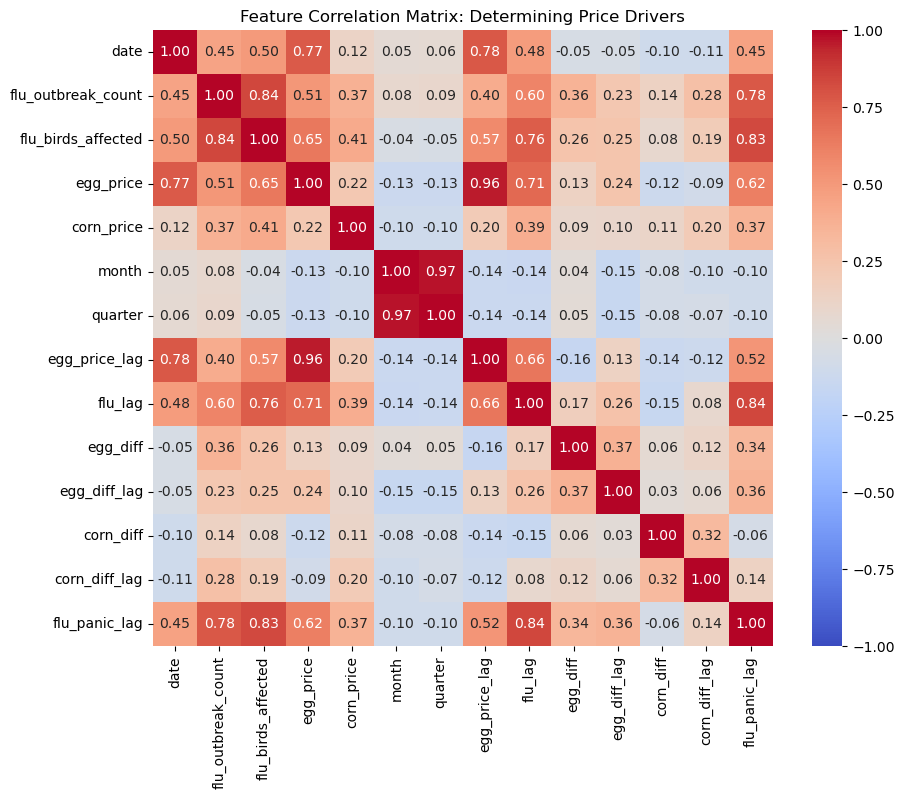

In [139]:
# Plot Correlation Matrix 
corr_matrix = df.corr()

fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            vmin=-1, vmax=1)

plt.title('Feature Correlation Matrix: Determining Price Drivers')
plt.savefig('images/eda/price_diff_correlation_matrix.png')